                **Study of roman road and how they influenced modern roads infrastructure**


---







First you have to import the data. Run code below and upload RomanRoad.csv and RomanRoad unziped folder which contains 3 files from the Team1 (Avengers) shared directory.

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving primary_road.dbf to primary_road.dbf
Saving primary_road.prj to primary_road.prj
Saving primary_road.shp to primary_road.shp
Saving primary_road.shx to primary_road.shx
Saving railway_line.dbf to railway_line.dbf
Saving railway_line.prj to railway_line.prj
Saving railway_line.shp to railway_line.shp
Saving railway_line.shx to railway_line.shx
Saving railway_point.dbf to railway_point.dbf
Saving railway_point.prj to railway_point.prj
Saving railway_point.shp to railway_point.shp
Saving railway_point.shx to railway_point.shx




Next create a dataframe using pandas library from Python.

In [ ]:
import pandas as pd 

#
pd.read_csv('RomanRoad.csv')

,Roman road,Approximate distance,Route,Via,Counterpart modern roads
0,Ackling Dyke,22 miles,Old Sarum (Sorviodunum) to Badbury Rings,Cranborne Chase,A354 at Woodyates
1,Akeman Street (1),78 miles,St Albans (Verulamium) to Cirencester (Corinium),Bicester (Alchester),A41 from Bicester to Tring
2,Akeman Street (2),76 miles,Wimpole to Brancaster (Branodunum),Cambridge (Duroliponte),A603 from Wimpole to Cambridge then A10 to Ely
3,Batham Gate,NaN,Buxton (Aquae Arnemetiae) to Templebrough,"B6049 Bradwell, Derbyshire","B6049 Bradwell, Derbyshire"
4,Cade's Road,100 miles,Brough (Petuaria) to Newcastle upon Tyne (Pons...,York (Eboracum); Thirsk;,A1034/1079 Brough-York
5,Dere Street,180 miles,York (Eboracum) to Antonine Wall at Carriden (...,Catterick (Cataractonium); Binchester (Bishop ...,A59 York to A1(M)
6,Devil's Causeway,55 miles,Hadrian's Wall/Dere Street to Berwick-upon-Tweed,"Hartburn, Powburn, Lowick",Stretches of the A697
7,Devil's Highway,NaN,London (Londinium) to Silchester (Calleva),London (Londinium); Staines (Pontes); Silchest...,Short stretches of the A30 and A315
8,Ermin Way,68 miles,Silchester (Calleva) to Gloucester (Glevum),Gloucester (Glevum); Cirencester (Corinium); S...,"B4000 Newbury to Stratton, Swindon, A419 Strat..."
9,Ermine Street,200 miles,London (Londinium) to York (Eboracum),Godmanchester (near Huntingdon; Durovigutum); ...,A10 London-Royston; A1198 Royston-Huntingdon; ...


Let's install library necesary for geo panda

In [ ]:

%%time 


# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

#Fiona package for reading and writing geospatial data files
#https://fiona.readthedocs.io/en/latest/manual.html
!pip install fiona





Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-7n5q7rme
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-7n5q7rm

Now see if we can use geopanda. I read a shape file with geopanda.
Plotting shp file of roman roads.




<Figure size 432x288 with 0 Axes>

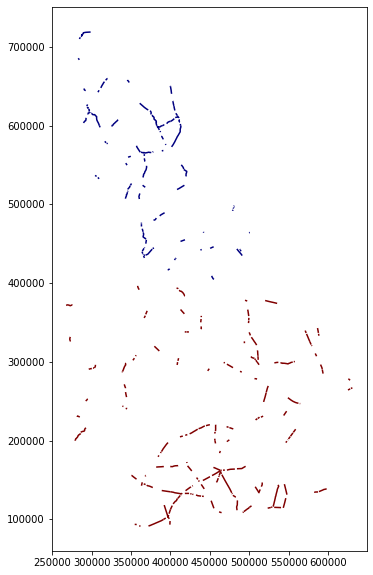

Index(['CODE', 'LEGEND', 'FILE_NAME', 'NUMBER', 'NAME', 'NUMBER0',
       'ADMIN_NAME', 'TYPE', 'FERRY_FROM', 'FERRY_TO', 'FERRY_TIME',
       'FERRY_TYPE', 'RESTRICTIO', 'ACCESS', 'AMENDED', 'USAGE', 'LOCATION',
       'GIS', 'OWNER', 'NORTH', 'SOUTH', 'EAST', 'WEST', 'CLOCKWISE',
       'ANTICLOCKW', 'IMPERIAL', 'METRIC', 'geometry'],
      dtype='object')

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


# importing and plotting Strategi_roman_roads.shp shape file
plt.savefig("england.png")
roman_roads = gpd.read_file("sample_data/Strategi_roman_roads.shp")

roman_roads.plot( cmap='jet', column = "FILE_NAME", figsize = (10,10))
plt.show()
# See what colums are in roma_roads shape fiel
roman_roads.columns


,CODE,LEGEND,AMENDED,NAME,ROAD_NO,geometry
0,5333,"A Road, Single Carriageway",20070502,None,A5037,"LINESTRING (334978.000 389670.000, 335148.000 ..."
1,5333,"A Road, Single Carriageway",19930101,None,A3110,"LINESTRING (91360.000 10800.000, 91485.000 107..."
2,5333,"A Road, Single Carriageway",20041015,None,A3112,"LINESTRING (90340.000 10500.000, 90569.000 103..."
3,5333,"A Road, Single Carriageway",20141217,None,A3111,"LINESTRING (90256.000 10556.000, 90250.000 105..."
4,5333,"A Road, Single Carriageway",19930101,None,A3110,"LINESTRING (91660.000 10700.000, 91770.000 107..."
...,...,...,...,...,...,...
31123,5335,"A Road, Single C'way over other feature",20151019,None,A259,"LINESTRING (494634.000 102012.000, 494758.000 ..."
31124,5335,"A Road, Single C'way over other feature",20150824,None,A5200,"LINESTRING (530376.000 183215.000, 530396.000 ..."
31125,5335,"A Road, Single C'way over other feature",20150824,None,A5203,"LINESTRING (530599.000 183195.000, 530528.000 ..."
31126,5335,"A Road, Single C'way over other feature",20150827,None,A148,"LINESTRING (562539.000 320543.000, 562518.000 ..."


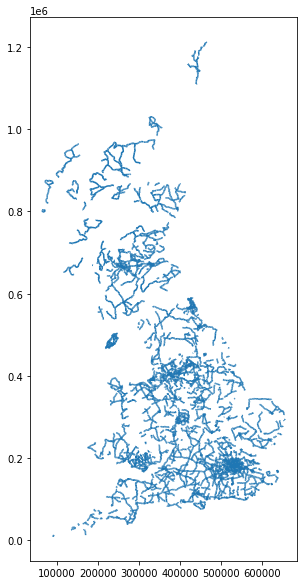

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt


modern_roads = gpd.read_file("a_road.shp")
modern_roads.plot(figsize = (10,10))
plt.show

modern_roads

In the next bit of code I will try to superimpose roman roads on top of modern roadas. I choosed primary roads , but also I would like to test with motorway.

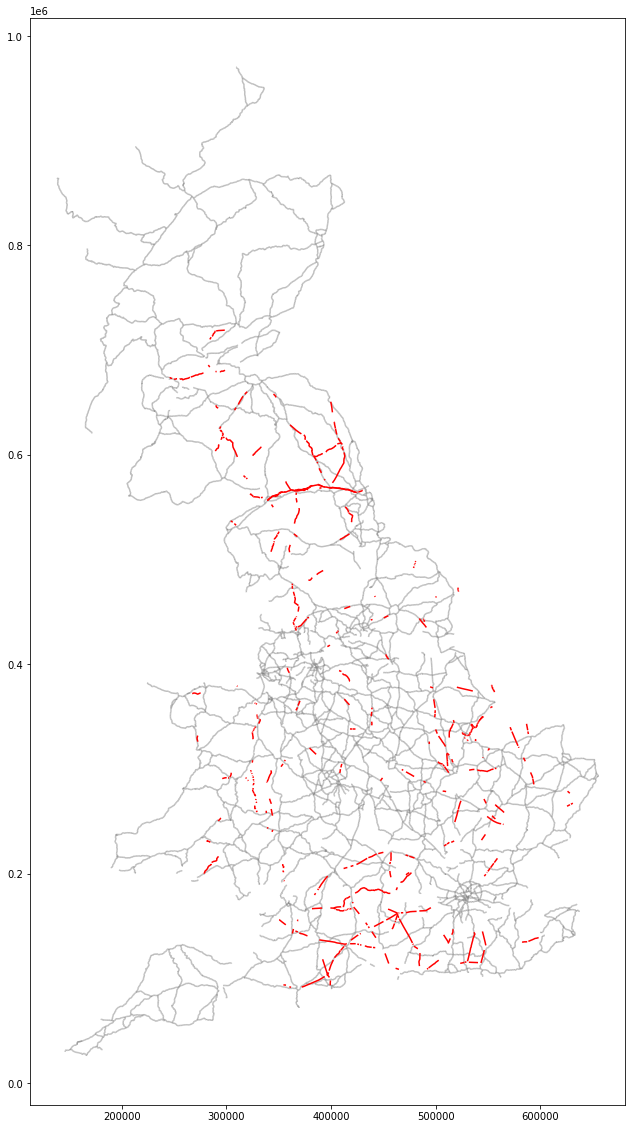

In [22]:
import geopandas as gpd
import matplotlib.pyplot as plt

antiquity_roads = gpd.read_file("antiquity_line.shp")
primary_roads = gpd.read_file("primary_road.shp")

# display both shape files together
fig, ax = plt.subplots(1, figsize = (20,20))
# parameter alpha control the level of transparency
primary_roads.plot(ax=ax, color='grey', alpha = 0.5)
antiquity_roads.plot(ax=ax, color = 'red')

#plt.savefig("roman_versus_modern_england_roads.png")


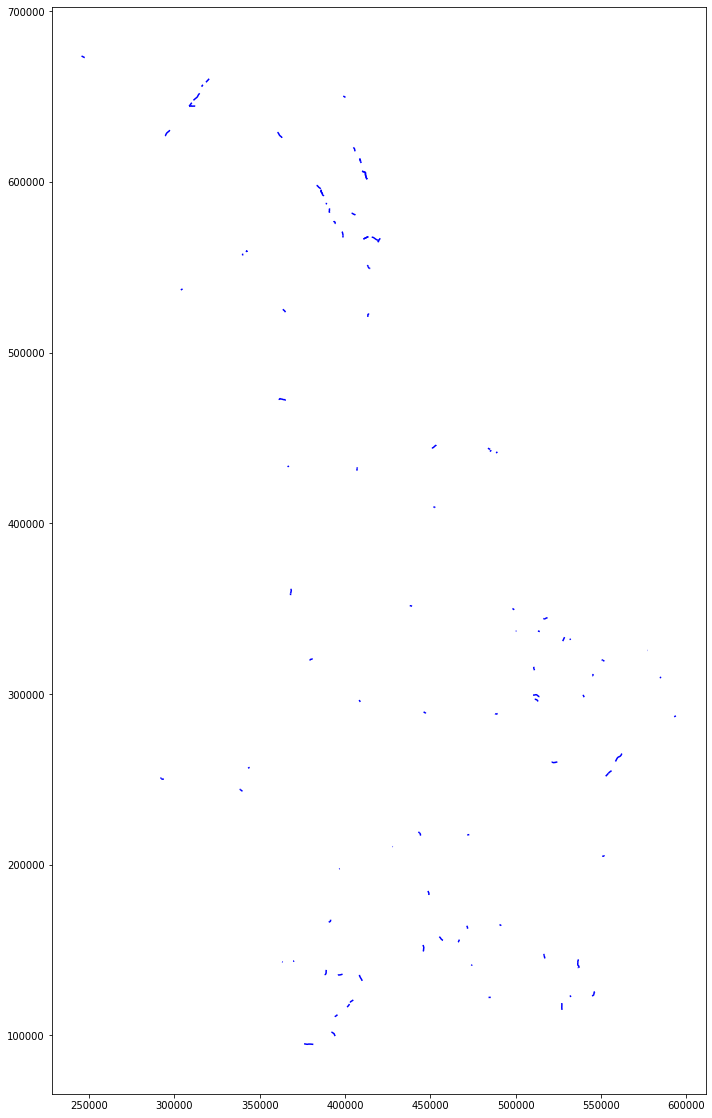

In [24]:
antiquity_roads = gpd.read_file("antiquity_line.shp")
primary_roads = gpd.read_file("primary_road.shp")

#Intersecting 
intersections= gpd.sjoin(primary_roads, antiquity_roads, how="inner", op='intersects')
intersections.head()
intersections.shape
intersections.plot(color ="blue", figsize = (20,20))
plt.savefig("intersection_roman_versus_modern_england_roads.png")
#roads_interesect = gpd.overlay(roman_roads, modern_roads, how = 'intersection')



Next I want to see how roman roads influenced the railways

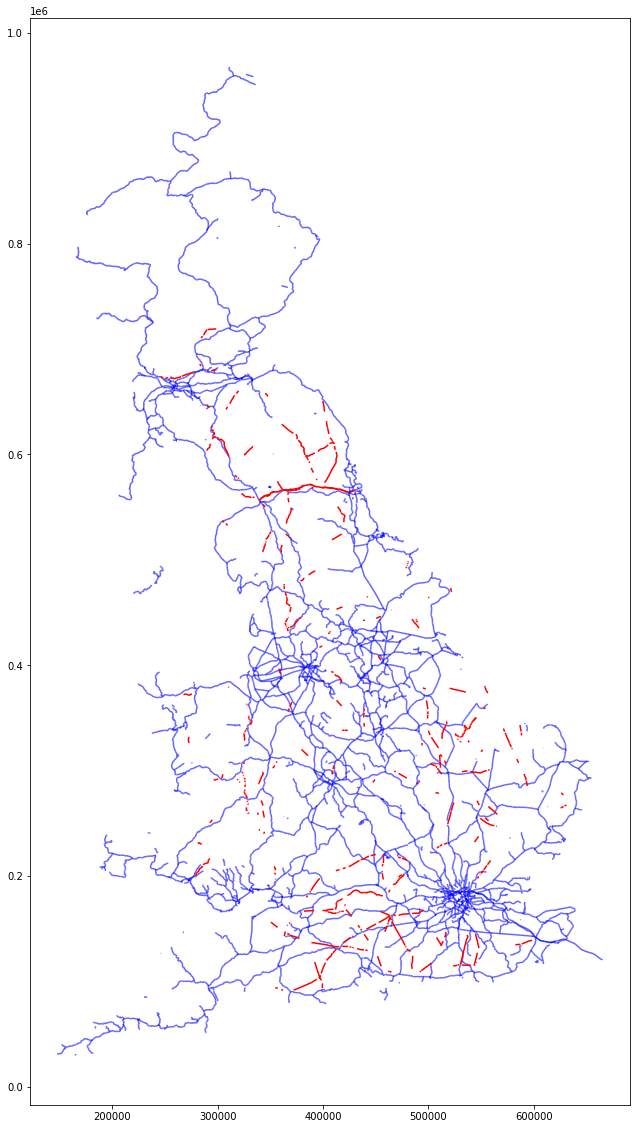

In [29]:

railway = gpd.read_file("railway_line.shp")
antiquity_roads = gpd.read_file("antiquity_line.shp")

# display both shape files together
fig, ax = plt.subplots(1, figsize = (20,20))
# parameter alpha control the level of transparency
railway.plot(ax=ax, color = 'blue', alpha = 0.6)
antiquity_roads.plot(ax=ax, color = 'red')

plt.savefig("roman_versus_railway.png")

